In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model 
from sklearn.model_selection import train_test_split





In [9]:
df = pd.read_csv('Dataset.csv')
df.info()

for col in df:
    print(col, df[col].unique())

df.describe() 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


<Axes: >

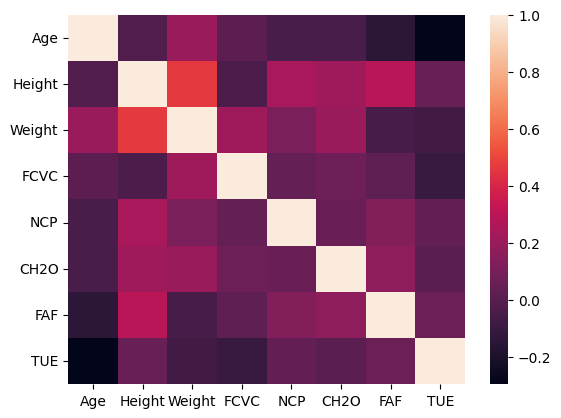

In [10]:
df_numerical = df.select_dtypes(exclude = 'object') 

sns.heatmap(df_numerical.corr())

In [12]:
X = np.array(df_numerical['Age'])
X = X.reshape(-1, 1)


Y = np.array(df_numerical['Weight'])
Y = Y.reshape(-1, 1)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state= 42) 

lm = linear_model.LinearRegression() 
model = lm.fit(X_train, Y_train) 
predictions = lm.predict(X_test) 

score = lm.score(X_test, Y_test)
print(f'Coeficiente R^2: {score:.2f}')


peso = model.predict([[30]])

print(f"Para uma idade de 30 anos o peso para ser considerado obeso é {peso[0][0]:.2f}")

Coeficiente R^2: 0.04
Para uma idade de 30 anos o peso para ser considerado obeso é 91.07
